# Setup, imports

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/honours
%ls

/content/drive/MyDrive/honours
all/    feature_extraction.py  nonsaturated/      prep_functions.py  saturated/
dried/  model_creation.py      plot_functions.py  __pycache__/       sheets/


In [3]:
from prep_functions import create_images_list, extract_gh_values,extract_lp_values, circle_cut_out, scale_fit_transform
from plot_functions import plot_metrics,lin_regression,plot_predictions,plot_all_validation
from model_creation import build_densenet, build_inception

In [4]:
import pandas as pd
import cv2
import numpy as np


from google.colab.patches import cv2_imshow #colab bug with imshow

from sklearn.model_selection import KFold

from tensorflow.keras.metrics import MeanAbsoluteError, RootMeanSquaredError
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import mean_squared_error,mean_absolute_error

# Data preparation

In [5]:
#loading two datasets into respective dataframes
gh_df = pd.read_csv('/content/drive/MyDrive/honours/sheets/GrievesHouse.csv')
lp_df = pd.read_csv('/content/drive/MyDrive/honours/sheets/LowerPilmore.csv')

gh_df.head()

,Sample,Stable aggregates (%)
0,1,65.88
1,2,23.90
2,2,31.86
3,3,89.14
4,4,68.71


In [6]:
# creating lists of images(scaled down) and respective label
gh_path = "/content/drive/MyDrive/honours/all/GrievesHouse/*.*"
lp_path = "/content/drive/MyDrive/honours/all/LowerPilmore/*.*"

gh_colour,gh_labels = create_images_list(gh_path,(256,256))
lp_colour,lp_labels = create_images_list(lp_path,(256,256))


In [7]:
gh_values = extract_gh_values(gh_labels,gh_df)
lp_values = extract_lp_values(lp_labels,lp_df)

#Data normalisation

In [8]:
gh_colour = [circle_cut_out(i) for i in gh_colour]
lp_colour = [circle_cut_out(i) for i in lp_colour]

gh_colour = [img / 255 for img in gh_colour]
lp_colour = [img / 255 for img in lp_colour]

X_col = gh_colour + lp_colour
y = gh_values + lp_values

y = np.array(y).reshape(-1, 1)

X_col = np.reshape(X_col,(len(X_col),256,256,3))


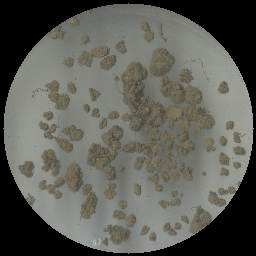

In [9]:
cv2_imshow(X_col[42]*255)

# Inception

In [10]:
kf = KFold(n_splits=5,shuffle=True,random_state=42)

------------------------------------------------------------------
------------------------------Fold 0------------------------------
------------------------------------------------------------------
Epoch 1/20
7/7 [==============================] - 23s 2s/step - loss: 269.4029 - mean_absolute_error: 11.3645 - root_mean_squared_error: 16.4135 - val_loss: 17.7424 - val_mean_absolute_error: 4.1114 - val_root_mean_squared_error: 4.2122
Epoch 2/20
7/7 [==============================] - 1s 132ms/step - loss: 7.2321 - mean_absolute_error: 2.1670 - root_mean_squared_error: 2.6893 - val_loss: 3.4068 - val_mean_absolute_error: 1.5902 - val_root_mean_squared_error: 1.8457
Epoch 3/20
7/7 [==============================] - 1s 130ms/step - loss: 3.1895 - mean_absolute_error: 1.4749 - root_mean_squared_error: 1.7859 - val_loss: 1.0301 - val_mean_absolute_error: 0.8442 - val_root_mean_squared_error: 1.0149
Epoch 4/20
7/7 [==============================] - 1s 161ms/step - loss: 2.3671 - mean_absolute

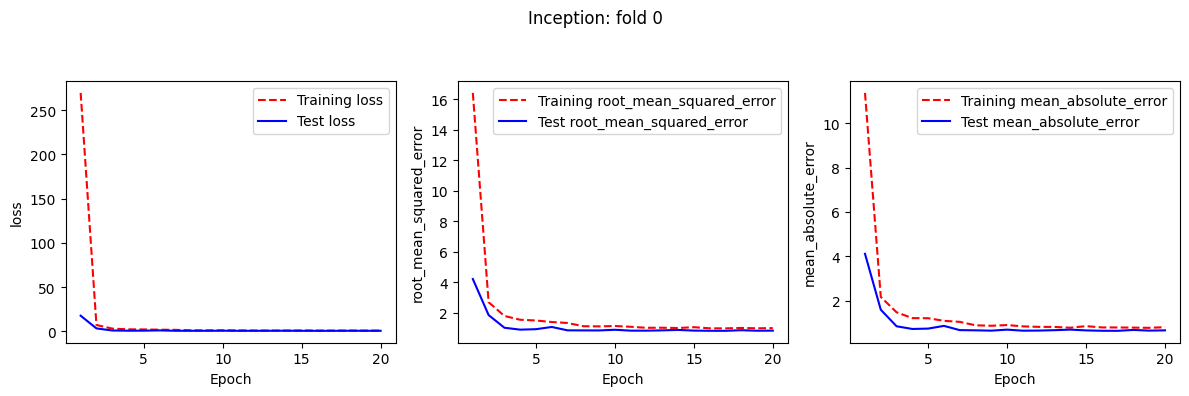

7/7 [==============================] - 1s 79ms/step


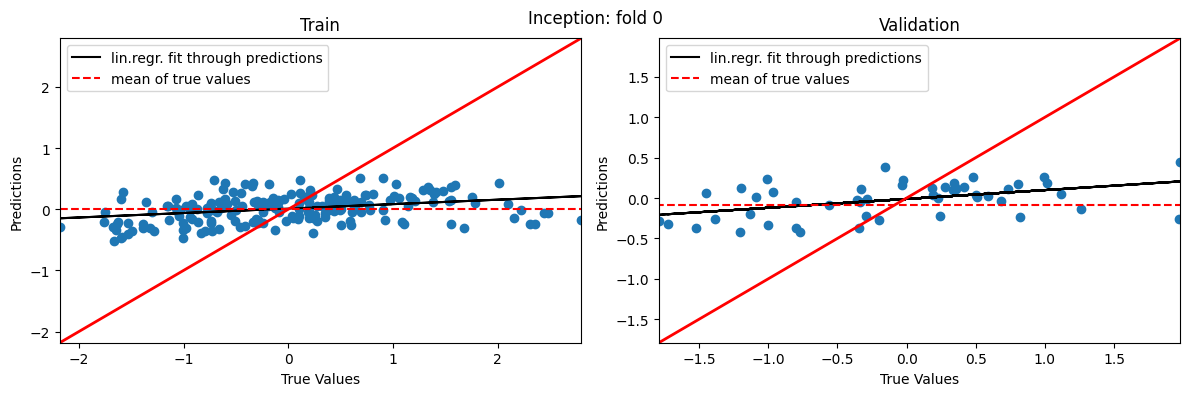

------------------------------------------------------------------
------------------------------Fold 1------------------------------
------------------------------------------------------------------
Epoch 1/20
7/7 [==============================] - 8s 428ms/step - loss: 109.9585 - mean_absolute_error: 8.2256 - root_mean_squared_error: 10.4861 - val_loss: 4.9285 - val_mean_absolute_error: 1.8754 - val_root_mean_squared_error: 2.2200
Epoch 2/20
7/7 [==============================] - 1s 164ms/step - loss: 7.7937 - mean_absolute_error: 2.4302 - root_mean_squared_error: 2.7917 - val_loss: 1.4265 - val_mean_absolute_error: 0.9715 - val_root_mean_squared_error: 1.1944
Epoch 3/20
7/7 [==============================] - 1s 166ms/step - loss: 2.5152 - mean_absolute_error: 1.3282 - root_mean_squared_error: 1.5859 - val_loss: 1.3558 - val_mean_absolute_error: 0.9314 - val_root_mean_squared_error: 1.1644
Epoch 4/20
7/7 [==============================] - 1s 144ms/step - loss: 1.5610 - mean_absolute

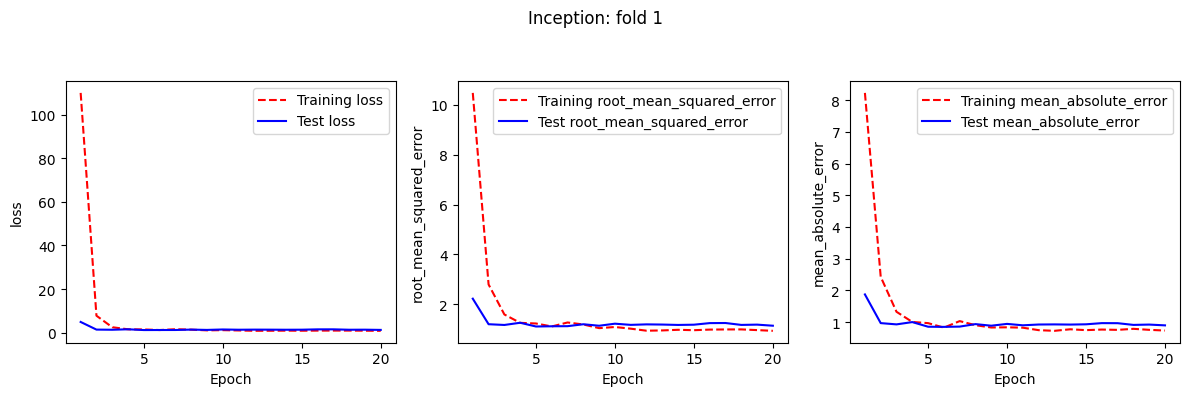

7/7 [==============================] - 1s 86ms/step


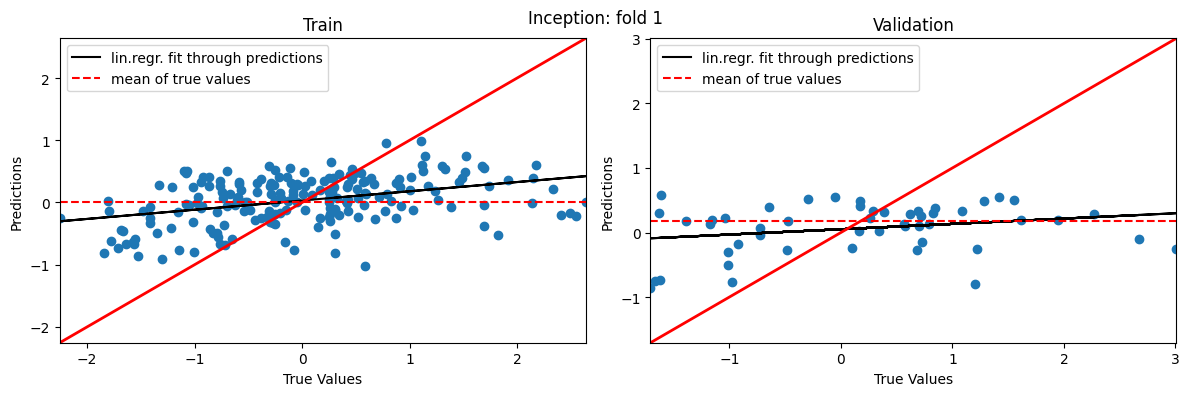

------------------------------------------------------------------
------------------------------Fold 2------------------------------
------------------------------------------------------------------
Epoch 1/20
7/7 [==============================] - 13s 1s/step - loss: 176.8618 - mean_absolute_error: 9.8613 - root_mean_squared_error: 13.2989 - val_loss: 7.9443 - val_mean_absolute_error: 2.6410 - val_root_mean_squared_error: 2.8186
Epoch 2/20
7/7 [==============================] - 1s 132ms/step - loss: 4.4646 - mean_absolute_error: 1.7683 - root_mean_squared_error: 2.1130 - val_loss: 2.5006 - val_mean_absolute_error: 1.3628 - val_root_mean_squared_error: 1.5813
Epoch 3/20
7/7 [==============================] - 1s 132ms/step - loss: 2.9132 - mean_absolute_error: 1.3642 - root_mean_squared_error: 1.7068 - val_loss: 1.2495 - val_mean_absolute_error: 0.8537 - val_root_mean_squared_error: 1.1178
Epoch 4/20
7/7 [==============================] - 1s 167ms/step - loss: 1.8472 - mean_absolute_e

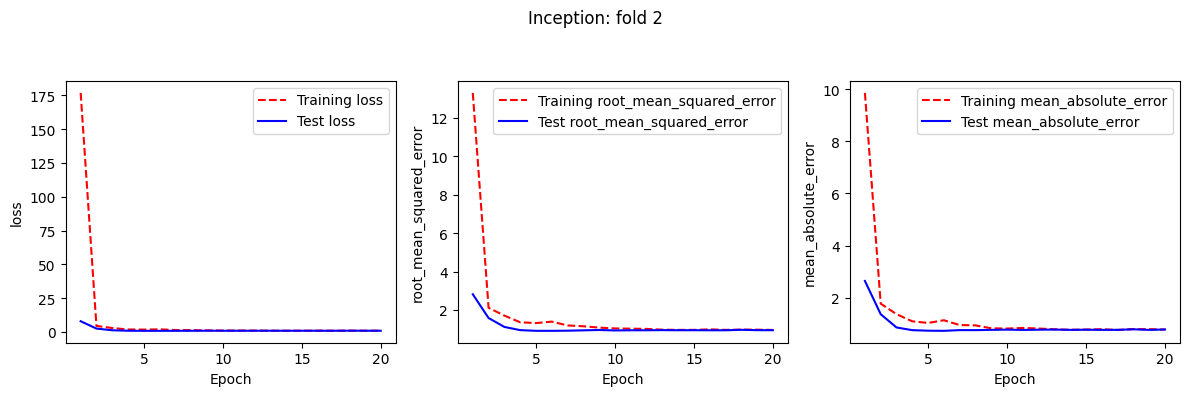

7/7 [==============================] - 1s 82ms/step


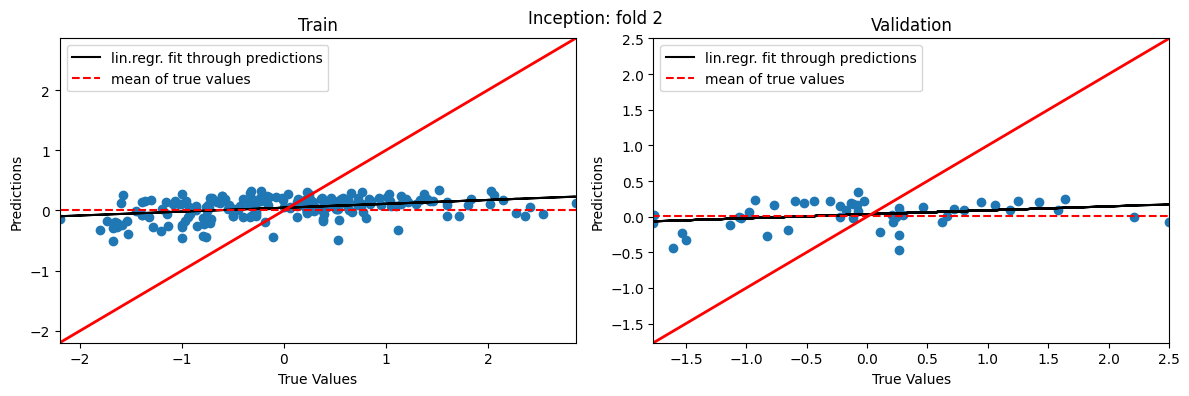

------------------------------------------------------------------
------------------------------Fold 3------------------------------
------------------------------------------------------------------
Epoch 1/20
7/7 [==============================] - 9s 434ms/step - loss: 176.6631 - mean_absolute_error: 10.3795 - root_mean_squared_error: 13.2915 - val_loss: 50.7546 - val_mean_absolute_error: 7.0274 - val_root_mean_squared_error: 7.1242
Epoch 2/20
7/7 [==============================] - 1s 133ms/step - loss: 15.7461 - mean_absolute_error: 3.1901 - root_mean_squared_error: 3.9681 - val_loss: 9.1129 - val_mean_absolute_error: 2.8440 - val_root_mean_squared_error: 3.0188
Epoch 3/20
7/7 [==============================] - 1s 159ms/step - loss: 5.5753 - mean_absolute_error: 2.0550 - root_mean_squared_error: 2.3612 - val_loss: 1.0359 - val_mean_absolute_error: 0.7688 - val_root_mean_squared_error: 1.0178
Epoch 4/20
7/7 [==============================] - 1s 134ms/step - loss: 1.9963 - mean_absol

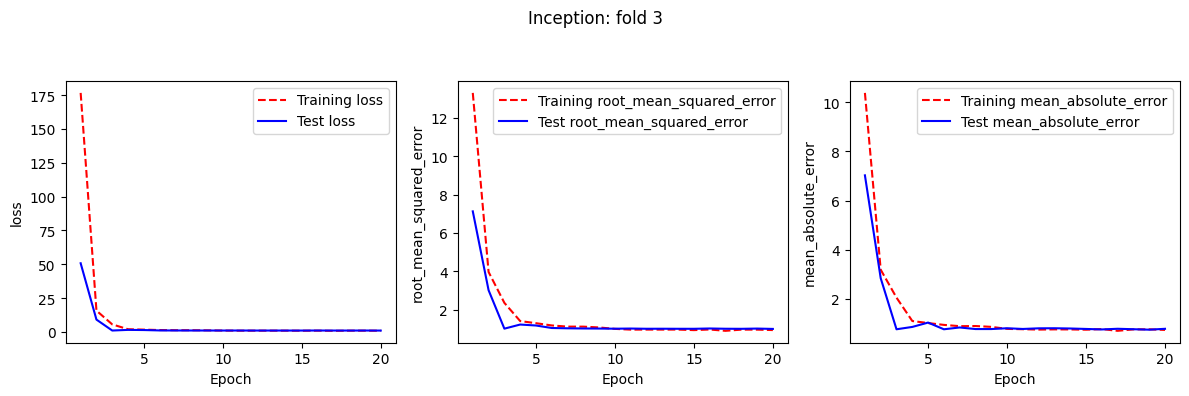

7/7 [==============================] - 1s 82ms/step


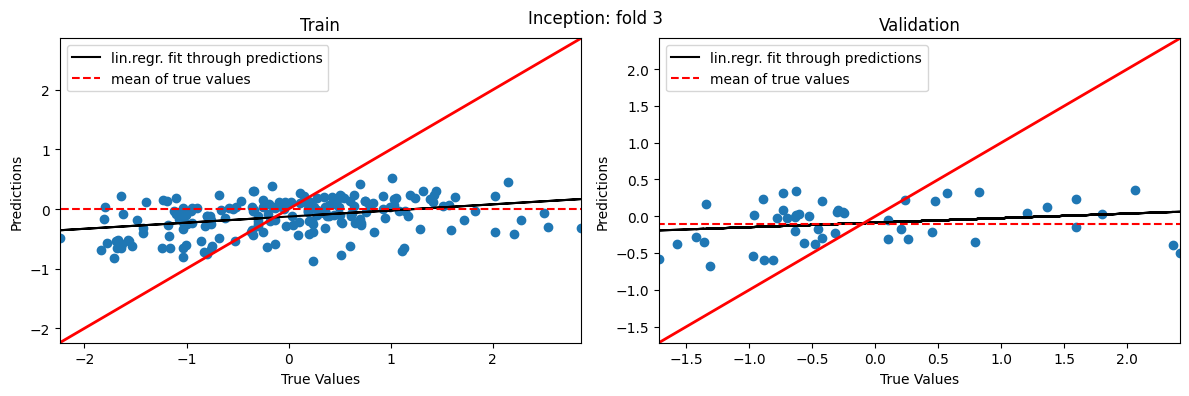

------------------------------------------------------------------
------------------------------Fold 4------------------------------
------------------------------------------------------------------
Epoch 1/20
7/7 [==============================] - 9s 428ms/step - loss: 226.5405 - mean_absolute_error: 11.2013 - root_mean_squared_error: 15.0513 - val_loss: 11.6977 - val_mean_absolute_error: 3.2742 - val_root_mean_squared_error: 3.4202
Epoch 2/20
7/7 [==============================] - 1s 158ms/step - loss: 5.4884 - mean_absolute_error: 1.9764 - root_mean_squared_error: 2.3427 - val_loss: 5.3768 - val_mean_absolute_error: 2.1068 - val_root_mean_squared_error: 2.3188
Epoch 3/20
7/7 [==============================] - 1s 137ms/step - loss: 4.8348 - mean_absolute_error: 1.9018 - root_mean_squared_error: 2.1988 - val_loss: 0.8867 - val_mean_absolute_error: 0.7256 - val_root_mean_squared_error: 0.9417
Epoch 4/20
7/7 [==============================] - 1s 151ms/step - loss: 1.8615 - mean_absolu

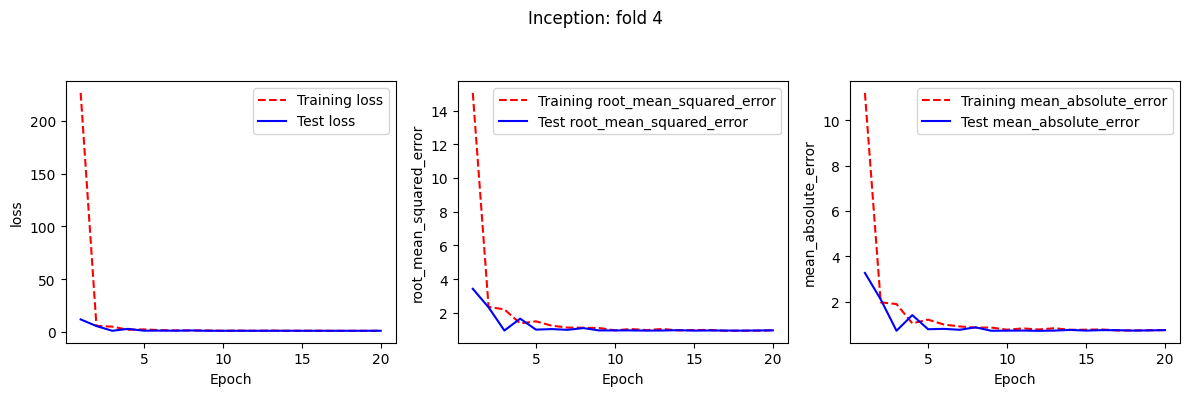

7/7 [==============================] - 1s 90ms/step


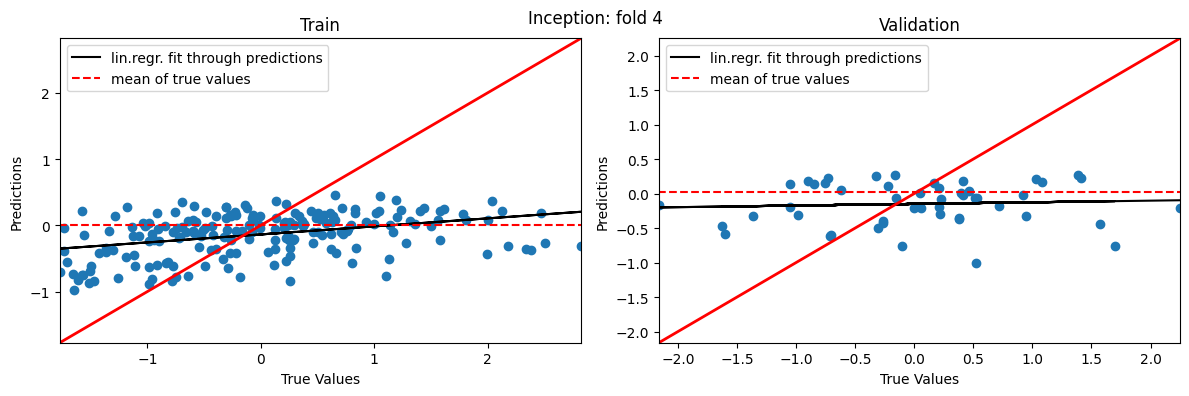

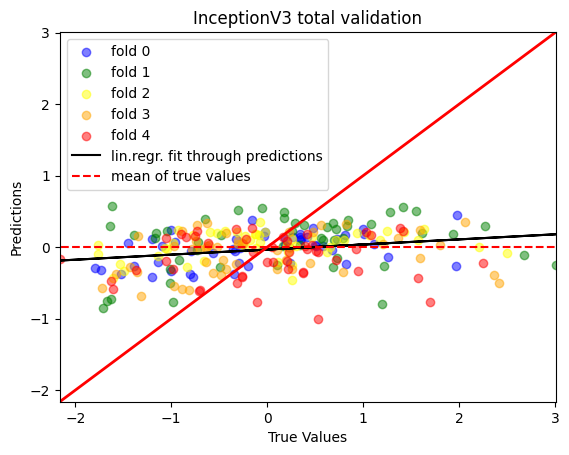

In [12]:
all_val_preds = []
all_val_true = []
for i,(train_idx,test_idx) in enumerate(kf.split(X_col)):
  print('-'*66)
  print('-'*30+f'Fold {i}'+'-'*30)
  print('-'*66)

  X_train = np.take(X_col, train_idx, axis=0)
  y_train = np.take(y, train_idx, axis=0)

  X_val = np.take(X_col, test_idx, axis=0)
  y_val = np.take(y, test_idx, axis=0)

  y_train,y_val = scale_fit_transform(y_train,y_val)

  #base model set to non-trainable, to train only the top randomly-initialised layers
  modelIV3 = build_inception((256,256,3),True,True,0.2)

  modelIV3.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=[MeanAbsoluteError(),RootMeanSquaredError()])
  h = modelIV3.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val,y_val))
  plot_metrics(h,['loss','root_mean_squared_error','mean_absolute_error'],True,f'Inception: fold {i}')

  y_val_pred = modelIV3.predict(X_val)
  y_train_pred = modelIV3.predict(X_train)
  all_val_preds.append(y_val_pred)
  all_val_true.append(y_val)

  plot_predictions(y_val.reshape(-1, 1),y_val_pred,y_train.reshape(-1, 1),y_train_pred,f'Inception: fold {i}')

plot_all_validation(all_val_true,all_val_preds,'InceptionV3 total validation')

In [13]:
print('Total validation RMSE:', mean_squared_error(np.concatenate(all_val_true).ravel(),np.concatenate(all_val_preds).ravel(),squared=False))

Total validation RMSE: 0.9777196329929122


In [14]:
print('Total validation MAE:', mean_absolute_error(np.concatenate(all_val_true).ravel(),np.concatenate(all_val_preds).ravel()))

Total validation MAE: 0.7756016849420324


#DenseNet

------------------------------------------------------------------
------------------------------Fold 0------------------------------
------------------------------------------------------------------
Epoch 1/20
7/7 [==============================] - 31s 2s/step - loss: 1.5715 - mean_absolute_error: 1.0007 - root_mean_squared_error: 1.2536 - val_loss: 0.7941 - val_mean_absolute_error: 0.7193 - val_root_mean_squared_error: 0.8911
Epoch 2/20
7/7 [==============================] - 1s 191ms/step - loss: 0.9985 - mean_absolute_error: 0.7807 - root_mean_squared_error: 0.9993 - val_loss: 0.8347 - val_mean_absolute_error: 0.7096 - val_root_mean_squared_error: 0.9136
Epoch 3/20
7/7 [==============================] - 1s 200ms/step - loss: 1.0070 - mean_absolute_error: 0.8282 - root_mean_squared_error: 1.0035 - val_loss: 0.8674 - val_mean_absolute_error: 0.7308 - val_root_mean_squared_error: 0.9313
Epoch 4/20
7/7 [==============================] - 1s 197ms/step - loss: 1.0888 - mean_absolute_erro

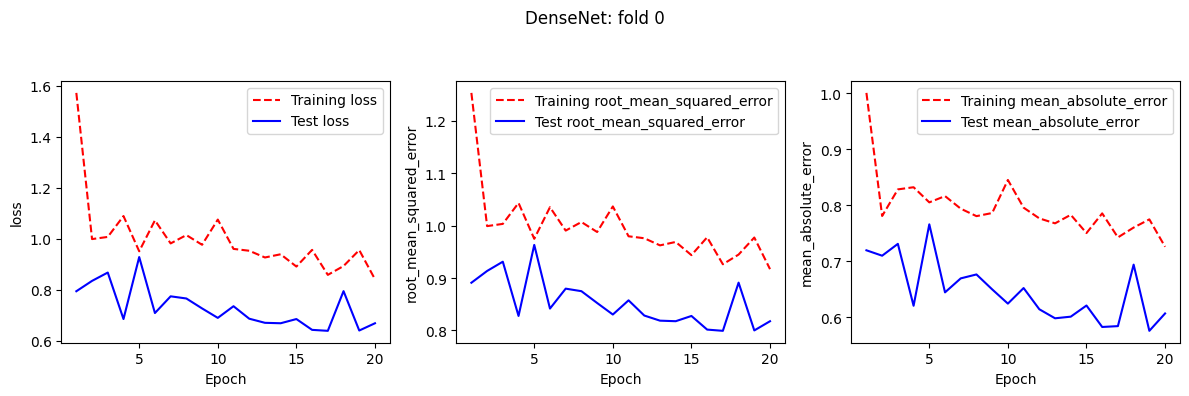

7/7 [==============================] - 1s 122ms/step


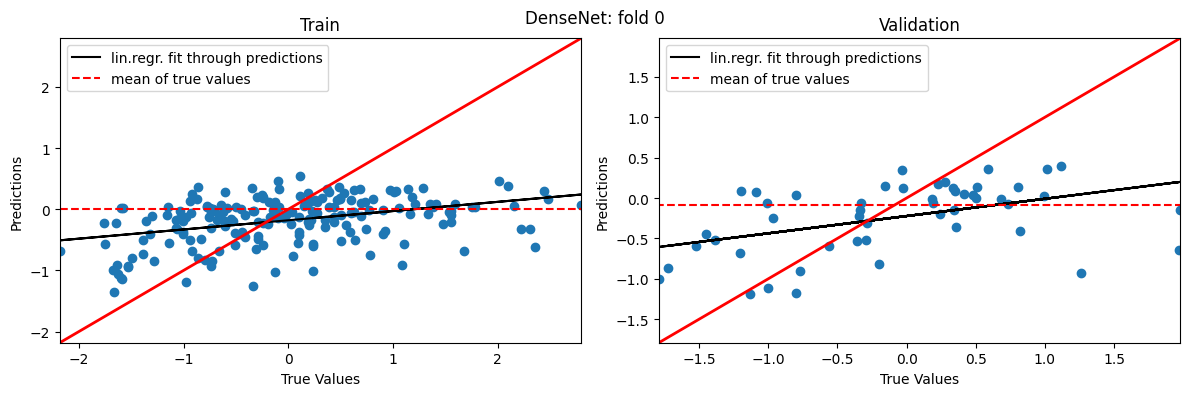

------------------------------------------------------------------
------------------------------Fold 1------------------------------
------------------------------------------------------------------
Epoch 1/20
7/7 [==============================] - 18s 968ms/step - loss: 1.2910 - mean_absolute_error: 0.9284 - root_mean_squared_error: 1.1362 - val_loss: 1.3076 - val_mean_absolute_error: 0.9254 - val_root_mean_squared_error: 1.1435
Epoch 2/20
7/7 [==============================] - 1s 168ms/step - loss: 1.0028 - mean_absolute_error: 0.8059 - root_mean_squared_error: 1.0014 - val_loss: 1.4799 - val_mean_absolute_error: 0.9658 - val_root_mean_squared_error: 1.2165
Epoch 3/20
7/7 [==============================] - 1s 170ms/step - loss: 0.9403 - mean_absolute_error: 0.7647 - root_mean_squared_error: 0.9697 - val_loss: 1.2088 - val_mean_absolute_error: 0.8601 - val_root_mean_squared_error: 1.0995
Epoch 4/20
7/7 [==============================] - 1s 170ms/step - loss: 0.9901 - mean_absolute_e

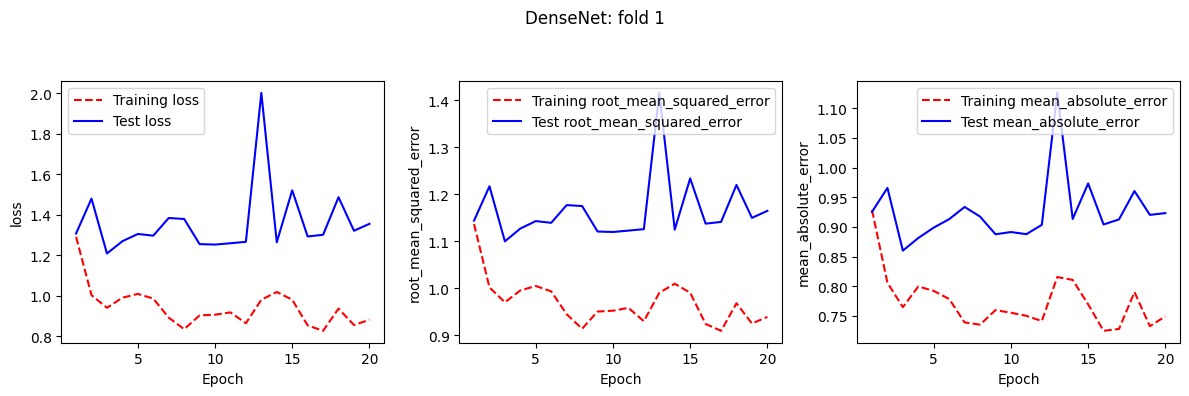

7/7 [==============================] - 1s 122ms/step


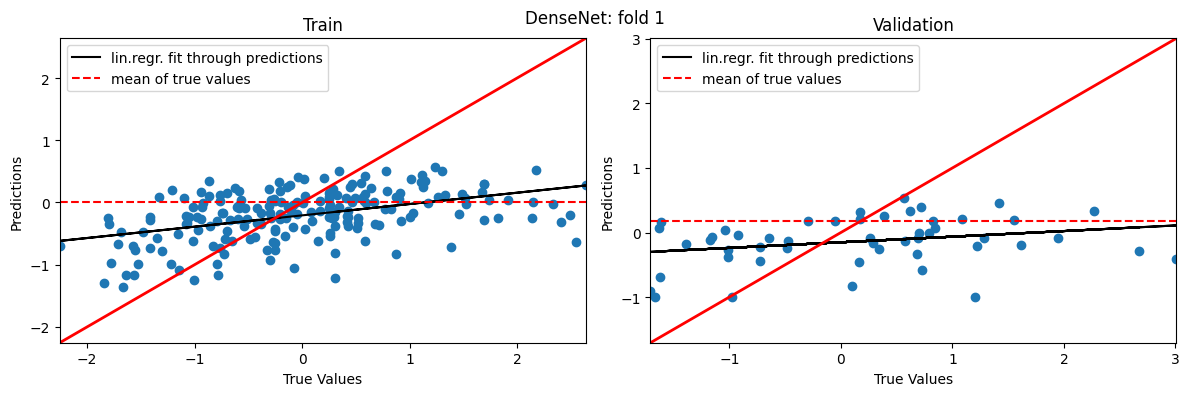

------------------------------------------------------------------
------------------------------Fold 2------------------------------
------------------------------------------------------------------
Epoch 1/20
7/7 [==============================] - 26s 2s/step - loss: 1.6109 - mean_absolute_error: 1.0357 - root_mean_squared_error: 1.2692 - val_loss: 0.9799 - val_mean_absolute_error: 0.7885 - val_root_mean_squared_error: 0.9899
Epoch 2/20
7/7 [==============================] - 1s 186ms/step - loss: 1.0883 - mean_absolute_error: 0.8048 - root_mean_squared_error: 1.0432 - val_loss: 0.8951 - val_mean_absolute_error: 0.7719 - val_root_mean_squared_error: 0.9461
Epoch 3/20
7/7 [==============================] - 1s 188ms/step - loss: 1.0889 - mean_absolute_error: 0.8476 - root_mean_squared_error: 1.0435 - val_loss: 0.9511 - val_mean_absolute_error: 0.7843 - val_root_mean_squared_error: 0.9753
Epoch 4/20
7/7 [==============================] - 1s 209ms/step - loss: 1.0003 - mean_absolute_erro

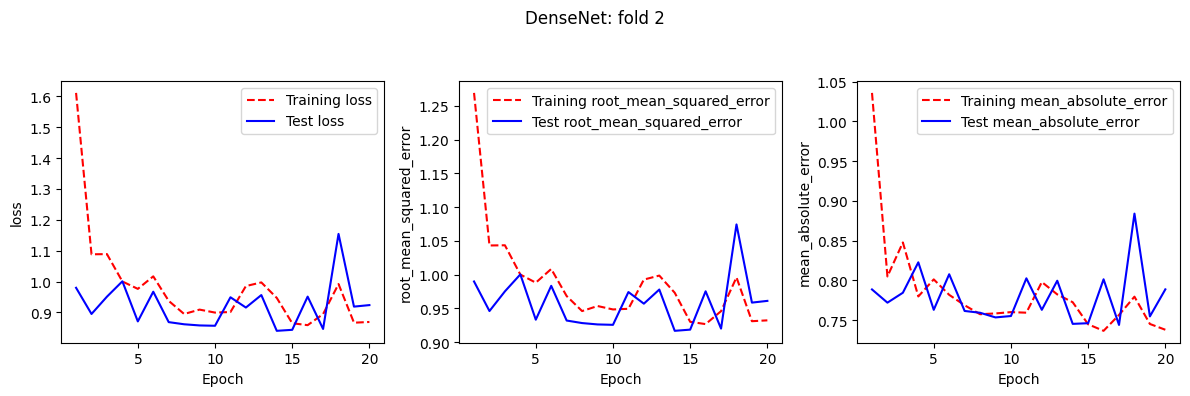

7/7 [==============================] - 1s 124ms/step


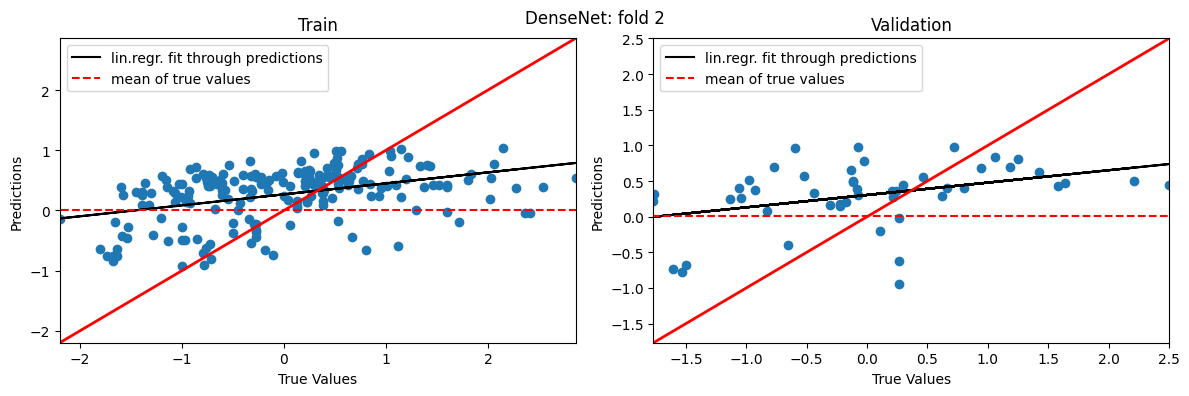

------------------------------------------------------------------
------------------------------Fold 3------------------------------
------------------------------------------------------------------
Epoch 1/20
7/7 [==============================] - 19s 1s/step - loss: 1.4650 - mean_absolute_error: 0.9886 - root_mean_squared_error: 1.2104 - val_loss: 1.7247 - val_mean_absolute_error: 1.1769 - val_root_mean_squared_error: 1.3133
Epoch 2/20
7/7 [==============================] - 1s 189ms/step - loss: 1.2642 - mean_absolute_error: 0.9010 - root_mean_squared_error: 1.1244 - val_loss: 1.0804 - val_mean_absolute_error: 0.7822 - val_root_mean_squared_error: 1.0394
Epoch 3/20
7/7 [==============================] - 1s 187ms/step - loss: 0.9696 - mean_absolute_error: 0.7955 - root_mean_squared_error: 0.9847 - val_loss: 1.1094 - val_mean_absolute_error: 0.8992 - val_root_mean_squared_error: 1.0533
Epoch 4/20
7/7 [==============================] - 1s 176ms/step - loss: 1.0138 - mean_absolute_erro

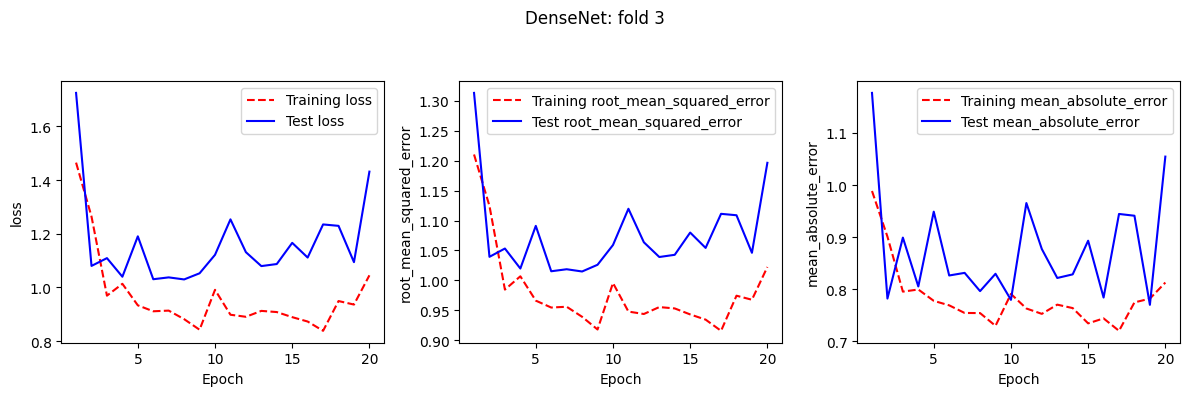

7/7 [==============================] - 1s 125ms/step


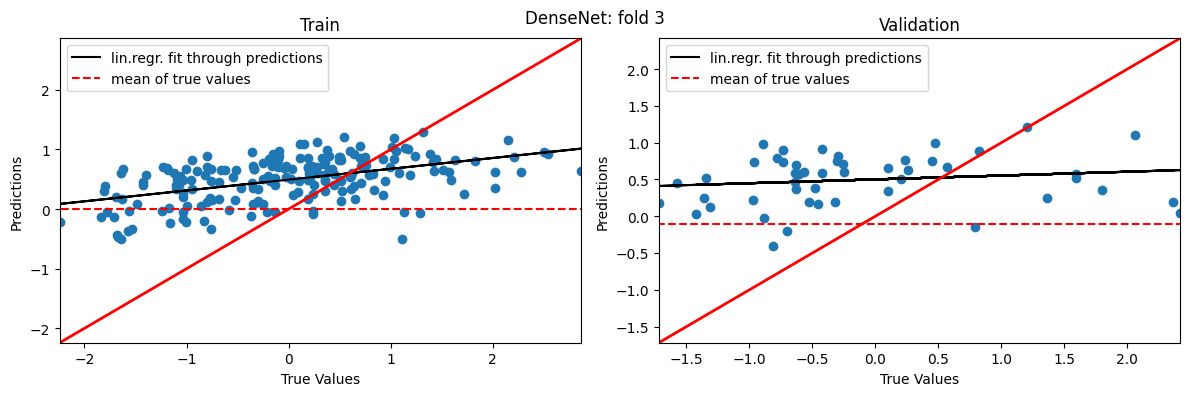

------------------------------------------------------------------
------------------------------Fold 4------------------------------
------------------------------------------------------------------
Epoch 1/20
7/7 [==============================] - 17s 918ms/step - loss: 1.1481 - mean_absolute_error: 0.8715 - root_mean_squared_error: 1.0715 - val_loss: 1.8025 - val_mean_absolute_error: 1.1093 - val_root_mean_squared_error: 1.3426
Epoch 2/20
7/7 [==============================] - 1s 181ms/step - loss: 1.1169 - mean_absolute_error: 0.8506 - root_mean_squared_error: 1.0568 - val_loss: 0.9077 - val_mean_absolute_error: 0.7524 - val_root_mean_squared_error: 0.9527
Epoch 3/20
7/7 [==============================] - 1s 191ms/step - loss: 0.9596 - mean_absolute_error: 0.7902 - root_mean_squared_error: 0.9796 - val_loss: 1.0446 - val_mean_absolute_error: 0.8261 - val_root_mean_squared_error: 1.0220
Epoch 4/20
7/7 [==============================] - 1s 176ms/step - loss: 0.8889 - mean_absolute_e

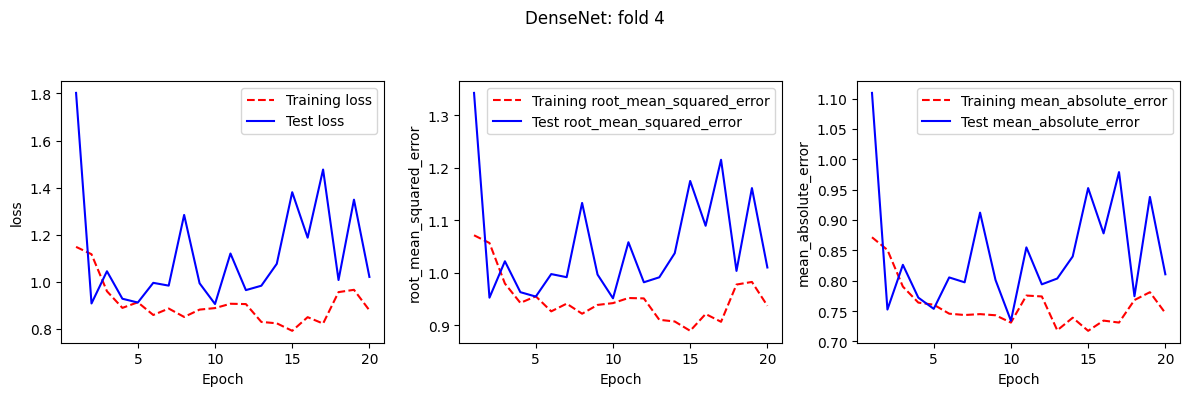

7/7 [==============================] - 1s 122ms/step


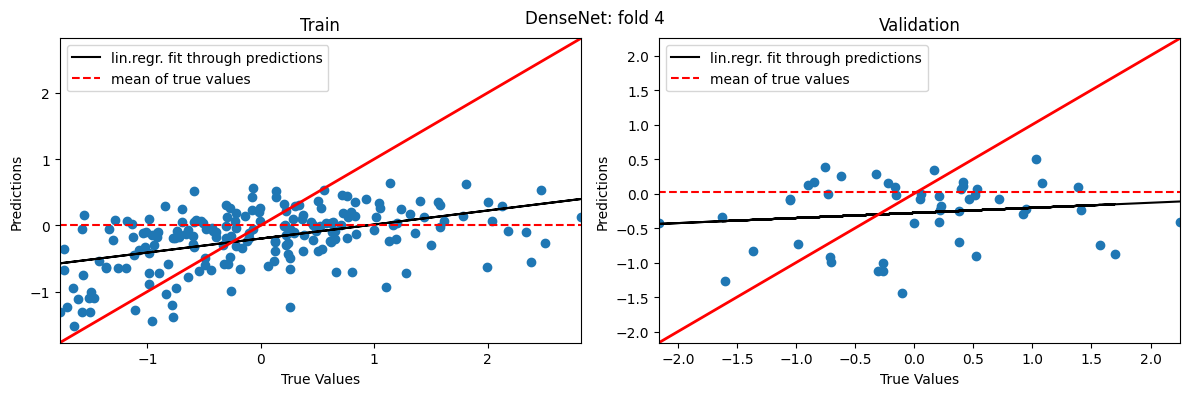

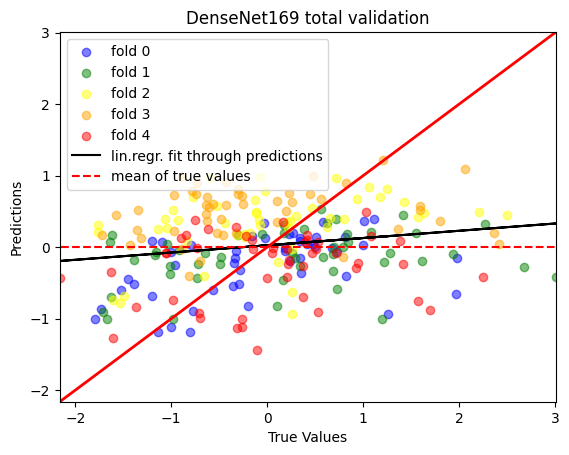

In [15]:
all_val_preds = []
all_val_true = []

for i,(train_idx,test_idx) in enumerate(kf.split(X_col)):
  print('-'*66)
  print('-'*30+f'Fold {i}'+'-'*30)
  print('-'*66)

  X_train = np.take(X_col, train_idx, axis=0)
  y_train = np.take(y, train_idx, axis=0)

  X_val = np.take(X_col, test_idx, axis=0)
  y_val = np.take(y, test_idx, axis=0)
  y_train,y_val = scale_fit_transform(y_train,y_val)

  modelDN169 = build_densenet((256,256,3),True,True,0)

  modelDN169.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=[MeanAbsoluteError(),RootMeanSquaredError()])
  h = modelDN169.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val,y_val))
  plot_metrics(h,['loss','root_mean_squared_error','mean_absolute_error'],True,f'DenseNet: fold {i}')


  y_val_pred = modelDN169.predict(X_val)
  y_train_pred = modelDN169.predict(X_train)
  all_val_preds.append(y_val_pred)
  all_val_true.append(y_val)


  plot_predictions(y_val.reshape(-1, 1),y_val_pred,y_train.reshape(-1, 1),y_train_pred,f'DenseNet: fold {i}')

plot_all_validation(all_val_true,all_val_preds,'DenseNet169 total validation')

In [16]:
print('Total validation RMSE:', mean_squared_error(np.concatenate(all_val_true).ravel(),np.concatenate(all_val_preds).ravel(),squared=False))

Total validation RMSE: 1.038947613441569


In [17]:
print('Total validation MAE:', mean_absolute_error(np.concatenate(all_val_true).ravel(),np.concatenate(all_val_preds).ravel()))

Total validation MAE: 0.836091190513334
